# Ejemplo 4.2: Conducción 1D con Fuente de Calor
 
 Este notebook resuelve un problema de **conducción de calor 1D en estado estacionario con una fuente de calor uniforme**.
 
 ### Planteamiento del Problema
 
 Se considera una placa de gran superficie y espesor $L = 2 \, cm$. Las caras A y B se mantienen a 100 °C y 200 °C, respectivamente. La placa genera calor de forma uniforme.
 
 **Ecuación Gobernante:**
 $$ \frac{d}{dx}\left(k\frac{dT}{dx}\right) + q = 0 $$
 
 **Datos:**
 - Conductividad térmica, $k = 0.5 \, W/m \cdot K$
 - Generación de calor, $q = 1000 \, kW/m^3 = 1 \times 10^6 \, W/m^3$
 - Espesor, $L = 0.02 \, m$
 - Temperatura en A, $T_A = 100 ^\circ C$
 - Temperatura en B, $T_B = 200 ^\circ C$


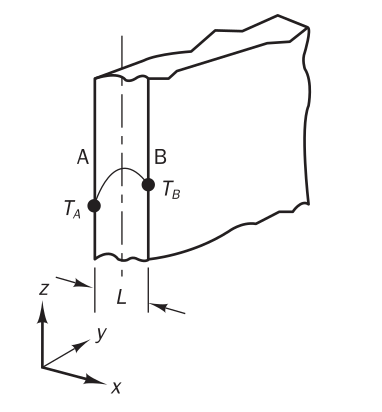

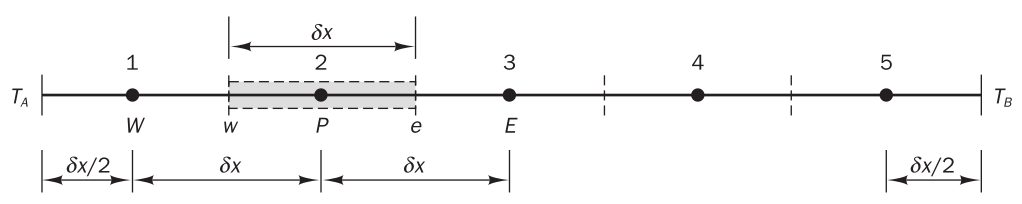

In [1]:
from mnspy import Vertice, Celda, Superficie, VolumenFinito, SuperficieDirichlet

### Paso 1: Definición de Parámetros y Discretización
 
Se discretiza el dominio en 5 volúmenes de control.

In [2]:
T_0 = 100
T_5 = 200
delta_x = 0.004
k = 0.5
q = 1E6  # Fuente de calor en W/m^3
A = 1

# Se crean los 6 vértices.
v = [Vertice(str(i), i*delta_x) for i in range(6)]

# Se crean las 6 superficies (caras), con los extremos a temperatura fija (Dirichlet).
s = [SuperficieDirichlet('0',[0], {'T': T_0}, A)]
s.append(Superficie('1',[1], A))
s.append(Superficie('2',[2], A))
s.append(Superficie('3',[3], A))
s.append(Superficie('4',[4], A))
s.append(SuperficieDirichlet('5',[5], {'T': T_5}, A))

# Se crean las 5 celdas, asignando la conductividad `k` y la fuente de calor `q`.
c = [Celda(str(i+1),[i,i+1], k, q) for i in range(len(s)-1)]

### Paso 2: Ensamblaje y Solución

In [3]:
vol = VolumenFinito(v,s,c)

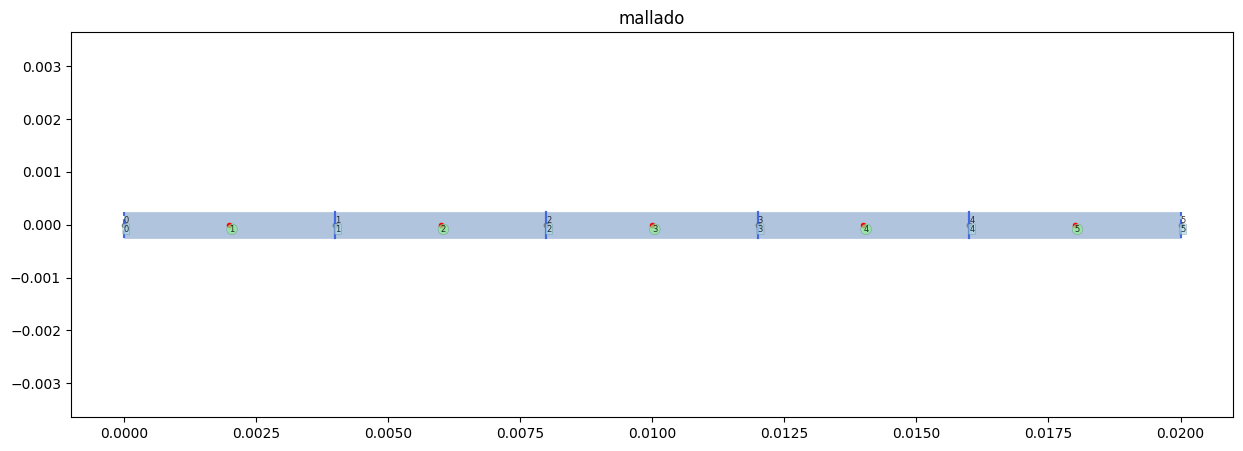

In [4]:
vol.mallado()

In [5]:
vol.mostrar_ecuaciones()

<IPython.core.display.Math object>

In [6]:
vol.solucionar_por_Gauss()
vol.mostrar_sistema_lineal_ecuaciones()

<IPython.core.display.Math object>

In [7]:
vol._sol.solucion()

,Solución
$T_{1}$,150
$T_{2}$,218
$T_{3}$,254
$T_{4}$,258
$T_{5}$,230


### Paso 3: Post-procesamiento y Visualización

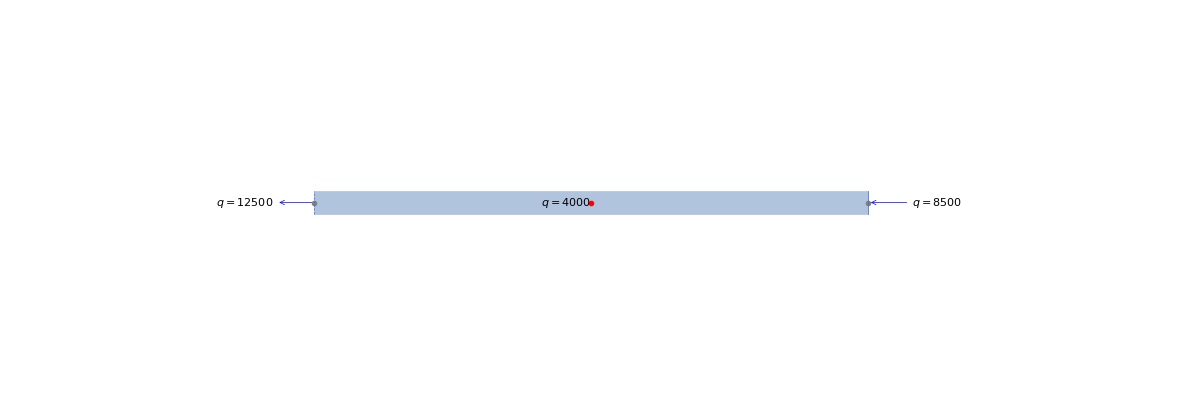

In [8]:
# Diagrama de balance para la primera celda. Nótese la presencia del término fuente.
vol.get_celda('1').diagrama_balance(False)

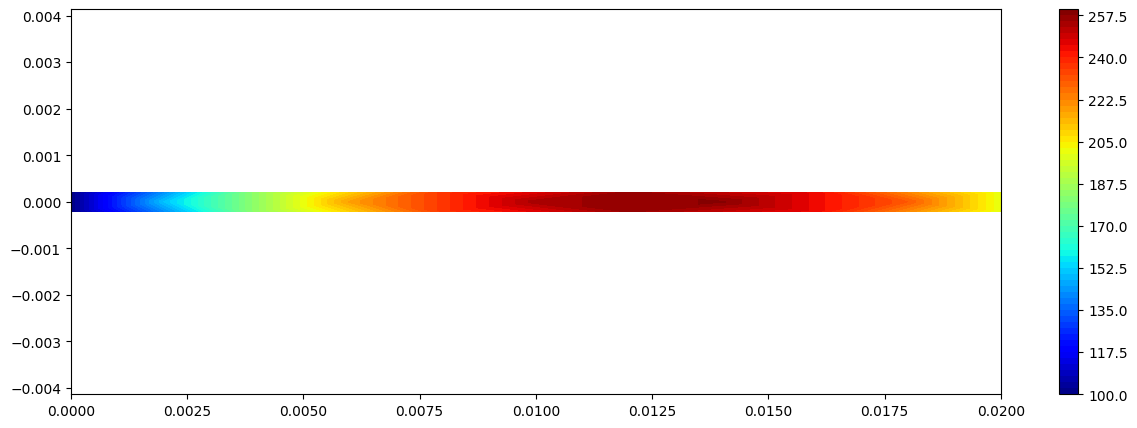

In [9]:
vol.diagrama_T()

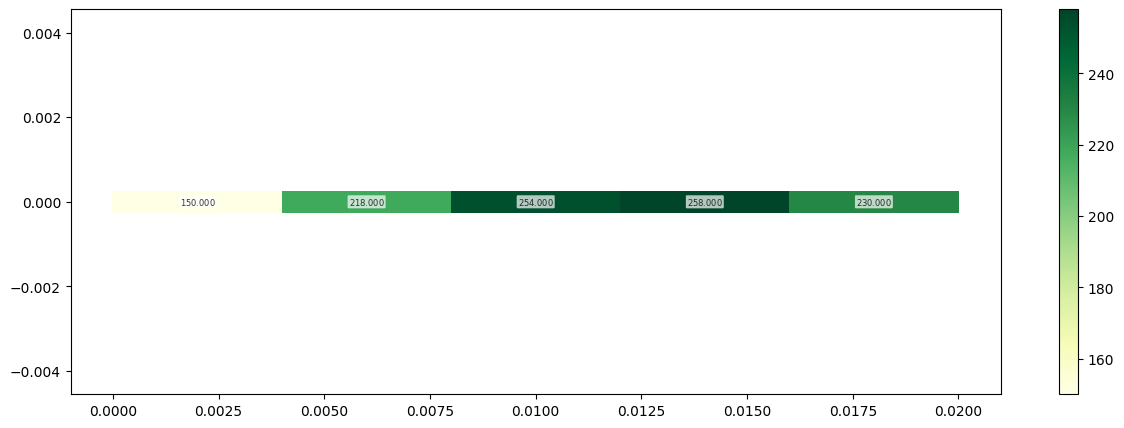

In [10]:
vol.diagrama_valores_escalar()

**Conclusión:** La presencia de una fuente de calor uniforme resulta en una distribución de temperatura **parabólica**, no lineal. La temperatura máxima se alcanza en el interior de la placa, no en los bordes.